In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
#Load species
species_info_df = pd.read_csv(r'C:\Users\asgei\Downloads\biodiversity-starter\biodiversity_starter\species_info.csv')

# Load observations
observations_df = pd.read_csv(r'C:\Users\asgei\Downloads\biodiversity-starter\biodiversity_starter\observations.csv')

In [37]:
print(species_info_df.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [38]:
print(observations_df.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [39]:
unique_conservation_status = species_info_df['conservation_status'].unique()

print(unique_conservation_status)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [40]:
#I've heard that wolves are endangered species. I want to create a list of endangered species and see if they are on there. 

In [41]:
endangered_animals = species_info_df[species_info_df['conservation_status'] == 'Endangered']

print(endangered_animals)

            category               scientific_name  \
8             Mammal                   Canis lupus   
9             Mammal                   Canis rufus   
34            Mammal             Myotis grisescens   
39            Mammal                Myotis sodalis   
72            Mammal  Glaucomys sabrinus coloratus   
173             Bird                Grus americana   
276             Bird           Vermivora bachmanii   
343             Bird             Picoides borealis   
540             Fish          Etheostoma percnurum   
570             Fish               Noturus baileyi   
2497  Vascular Plant                 Geum radiatum   
3275            Fish             Chasmistes liorus   
4446          Mammal       Ovis canadensis sierrae   
4448          Mammal                   Canis lupus   
4505            Bird       Gymnogyps californianus   
4601       Amphibian                  Rana sierrae   

                                           common_names conservation_status  
8  

In [42]:
#In the endangered species list, there are two types of wolf, red wolf and gray wolf (mentioned twice). I want to know in what 
#national parks these wolves have been spotted. Let's take a look at that. 

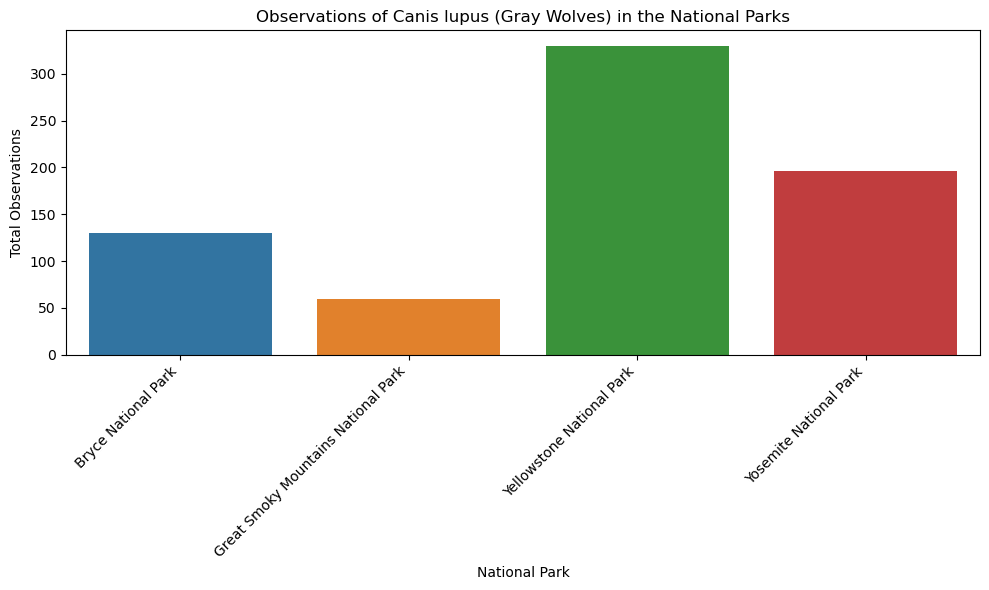

In [43]:
canis_lupus_obs = observations_df[observations_df['scientific_name'] == 'Canis lupus']

observations_by_park = canis_lupus_obs.groupby('park_name')['observations'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='park_name', y='observations', data=observations_by_park)
plt.title('Observations of Canis lupus (Gray Wolves) in the National Parks')
plt.xlabel('National Park')
plt.ylabel('Total Observations')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()
plt.close()

In [44]:
#Most Canis lupus (Grey wolf) observations have been in Yellow Stone Park.

In [45]:
#Let's do the same for the Red wolf (Canis rufus)

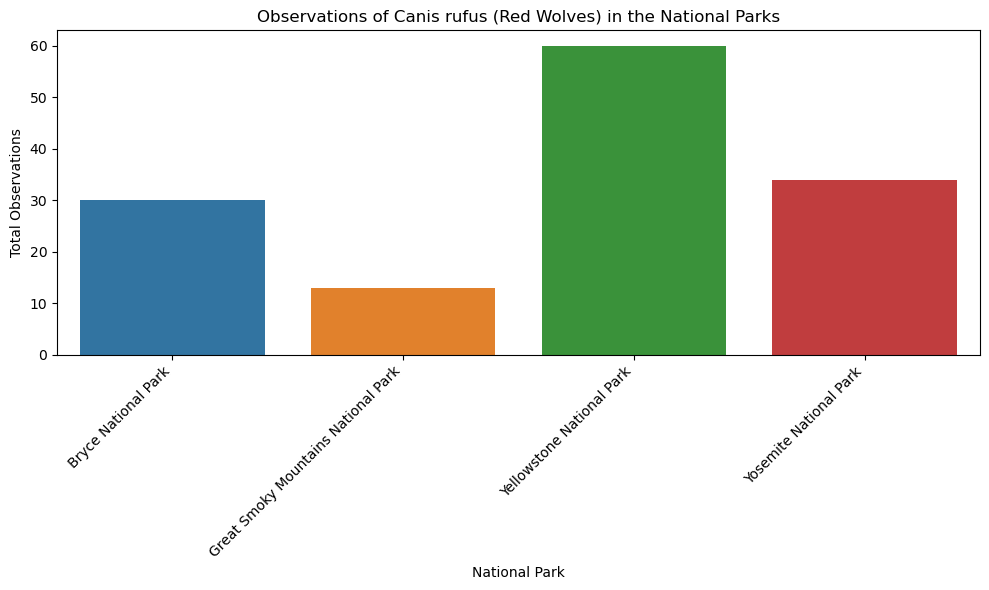

In [46]:
canis_rufus_obs = observations_df[observations_df['scientific_name'] == 'Canis rufus']

observations_by_park = canis_rufus_obs.groupby('park_name')['observations'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='park_name', y='observations', data=observations_by_park)
plt.title('Observations of Canis rufus (Red Wolves) in the National Parks')
plt.xlabel('National Park')
plt.ylabel('Total Observations')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()
plt.close()

In [47]:
#There are a lot few Red Wolfs than there are Grey Wolfs. But again, most of the observations are in the Yellow Stone Park. 

In [48]:
#With that curiosity out of the way, I wonder what species are most prominent in each conservation category.

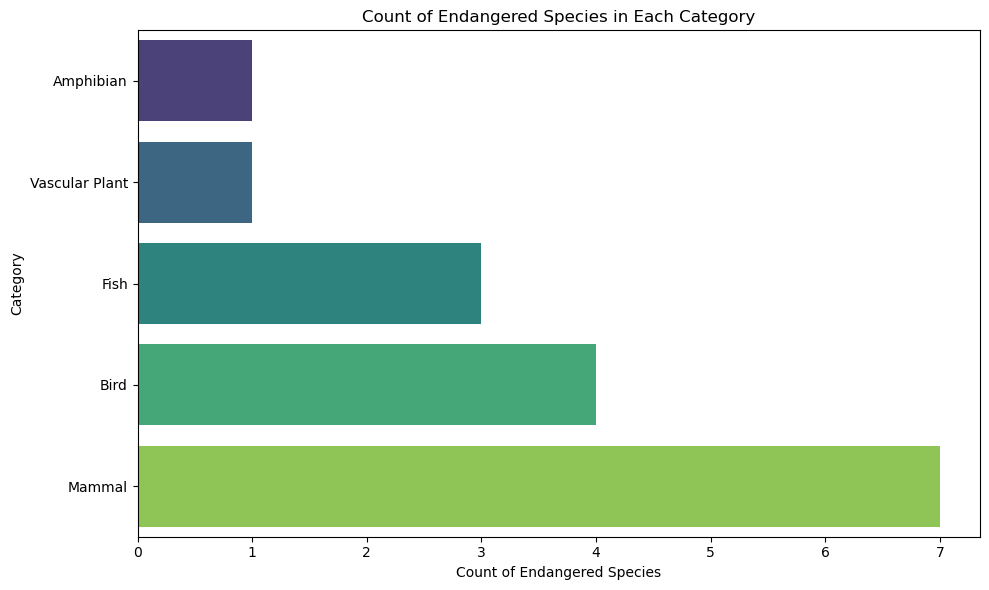

In [49]:
endangered_species = species_info_df[species_info_df['conservation_status'] == 'Endangered']

endangered_species_count = endangered_species.groupby('category').size().reset_index(name='count')

endangered_species_count = endangered_species_count.sort_values(by='count', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='category', data=endangered_species_count, palette='viridis')
plt.title('Count of Endangered Species in Each Category')
plt.xlabel('Count of Endangered Species')
plt.ylabel('Category')
plt.tight_layout()
plt.show()
plt.close()

In [50]:
#Mammals are most prominent in the endangered category. Let's do the same for 'Species of Concern' and 'Threatened.' 

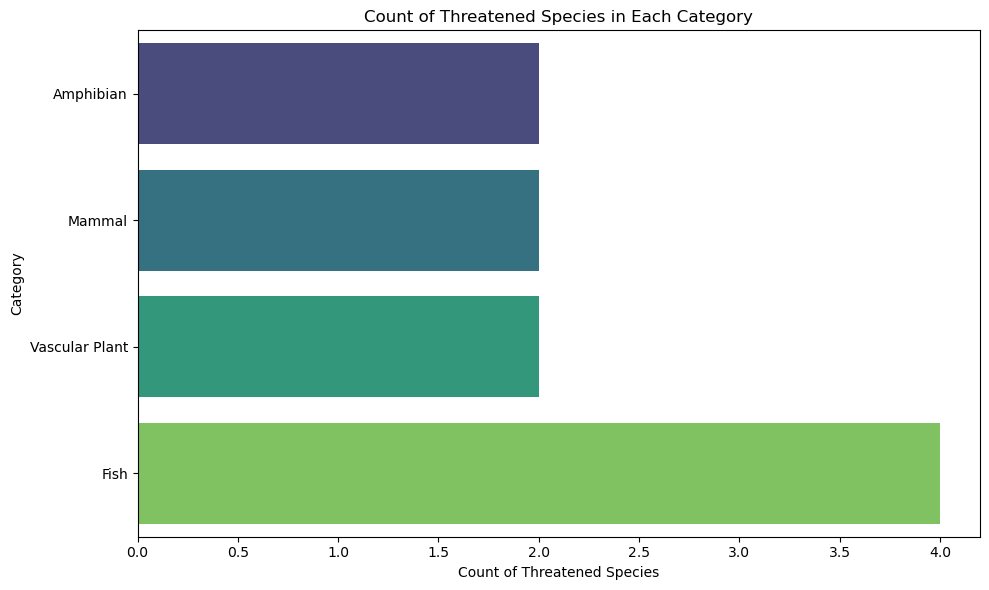

In [62]:
threatened_species = species_info_df[species_info_df['conservation_status'] == 'Threatened']

threatened_species_count = threatened_species.groupby('category').size().reset_index(name='count')

threatened_species_count = threatened_species_count.sort_values(by='count', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='category', data=threatened_species_count, palette='viridis')
plt.title('Count of Threatened Species in Each Category')
plt.xlabel('Count of Threatened Species')
plt.ylabel('Category')
ax.set_xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()
plt.close()

In [52]:
#In the Threatened category, fish are most prominent.

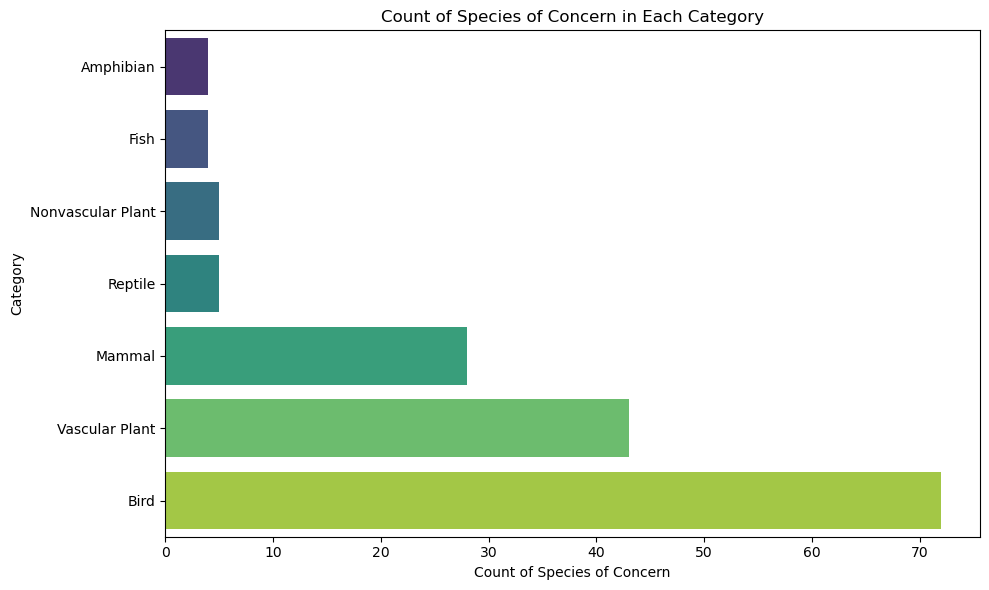

In [61]:
species_of_concern = species_info_df[species_info_df['conservation_status'] == 'Species of Concern']

species_of_concern_count = species_of_concern.groupby('category').size().reset_index(name='count')

species_of_concern_count = species_of_concern_count.sort_values(by='count', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='category', data=species_of_concern_count, palette='viridis')
plt.title('Count of Species of Concern in Each Category')
plt.xlabel('Count of Species of Concern')
plt.ylabel('Category')
plt.tight_layout()
plt.show()
plt.close()

In [55]:
#Here we can see that Birds are byfar the most common species that fall under the category "Species of Concern."